# Generator slučajnih števil
Uporabi vgrajeno funkcijo rand in naredi generator naključnih števil z dano porazdelitveno funkcijo.
Če je $U\sim U([0,1])$ enakomerno porazdeljena na $[0,1]$ potem je $F^{-1}(U)$ porazdeljena s porazdelitvijo, ki ima porazdelitveno funkcijo $F$.

## Eksponentna porazdelitev
Gostota $\rho_Y(x) =\lambda e^{-\lambda x}$, porazdelitvena funkcija je $F_Y = 1-e^{-\lambda x}$ in $F^{-1} = -\log(1-x)/\lambda$

In [87]:
Finv = @(x,lam) -log(1-x)/lam

Finv =

@(x, lam) -log (1 - x) / lam



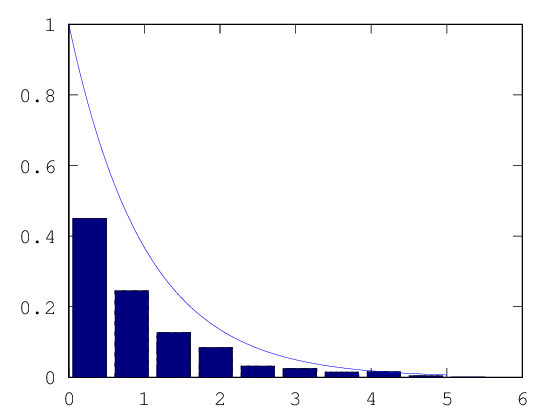

In [88]:
 n = 1000;
 u = rand(n,1);
 Y = Finv(u,1);
 [h,x] = hist(Y,10,1);
 dx = x(2)-x(1);
 bar(x,h);
 hold on
 t = linspace(0,5);
 plot(t,exp(-t))

# Porazdelitev 2
Porazdelitev z gostoto
$$
f_Y(x)=\cases{x-1;\quad 1\le x \lt 2\\ 3-x;\quad 2\lt x\le 3\\ 0;\quad \text{sicer}}
$$
Porazdelitvena funkcija je tudi zlepek
Inverz porazdelitve pa rav tako
$$
F_Y^{-1}(x)=\cases{1+\sqrt{2x};\quad 0\le x \lt \frac{1}{2}\\ 3-\sqrt{2(1-x)}x;\quad \frac{1}{2}\lt x\le 1}
$$

In [36]:
function y = rho(x)
    y = zeros(size(x));
    idx = find((1<=x)&(x<2));
    y(idx) = x(idx)-1;
    idx = find((2<x) & (x<=3));
    y(idx) = 3-x(idx);
end
function y = Finv(x)
    y = zeros(size(x));
    idx = find((0<=x) & (x<0.5));
    y(idx) = 1+sqrt(2*x(idx));
    idx = find((0.5<=x) & (x<=1));
    y(idx) = 3-sqrt(2*(1-x(idx)));
end

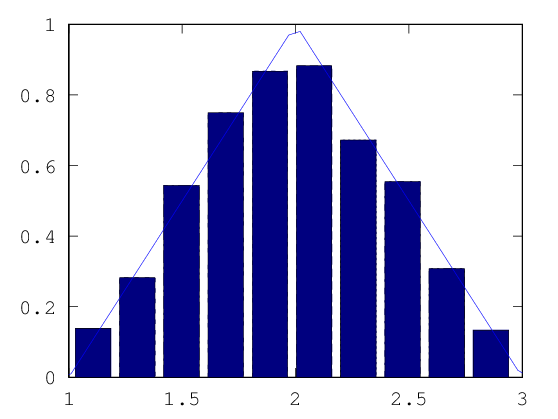

In [85]:
 n = 1000;
 u = rand(n,1);
 Y = Finv(u,1);
 [h,x] = hist(Y,10);
 dx = x(2)-x(1);
 hist(Y,10,1/dx);
 hold on
 t = linspace(0,5);
 plot(t,rho(t))
 hold off

# Normalna porazdelitev
Normalno porazdelitev lahko dobimo z dvema slučajnima spremenljivkama $U_1,U_2\sim U(0,1)$ in transformacijo

\begin{eqnarray*}
Z_1 &=& \sqrt{U_1}\cos(2\pi U_2)\\
Z_2 &=& \sqrt{U_1}\sin(2\pi U_2) 
\end{eqnarray*}


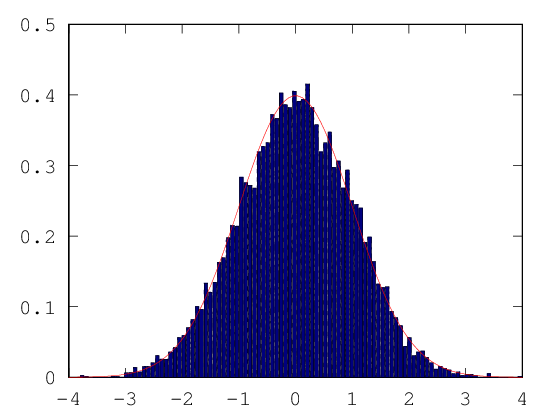

In [205]:
n = 10000;
u1 = rand(n,1);
u2 = rand(n,1);
r = sqrt(-2*log(u1));
Z = [r.*cos(2*pi*u2) r.*sin(2*pi*u2)];
[h,x]=hist(Z(:,1),100);
dx = x(2)-x(1);
bar(x, h/(sum(h)*dx))
hold on
t = linspace(-4,4);
plot(t,exp(-t.^2/2)/sqrt(2*pi),'r')

# Večrazsežna normalna porazdelitev
Generirati želimo večrazsežno normalno porazdelitev z danim matematičnim upanjem $\mathbf{\mu}$ in kovariančno matriko $\Sigma$.

In [110]:
n = 1000;
u1 = rand(n,1);
u2 = rand(n,1);
r = sqrt(-2*log(u1));
Z = [r.*cos(2*pi*u2) r.*sin(2*pi*u2)];

In [111]:
S = [2 1; 1 2];
[Q,L] = eig(S)

Q =

  -0.70711   0.70711
   0.70711   0.70711

L =

Diagonal Matrix

   1   0
   0   3



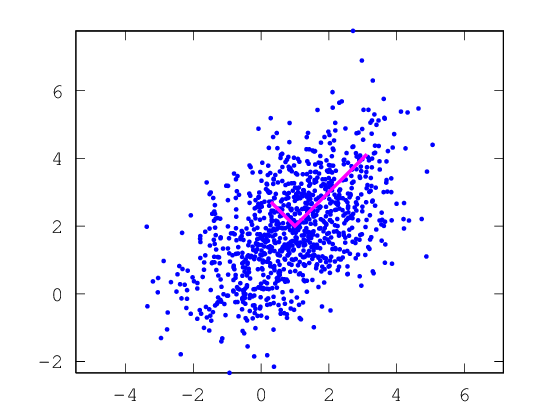

In [118]:
T = Q*L;
Z1 = Q*sqrt(L)*Z' + [1;2]*ones(1,n);
plot(Z1(1,:), Z1(2,:),'.')
hold on
plot(1+[0 T(1,1) 0 T(1,2)],2+[0 T(2,1) 0 T(2,2)],'m','linewidth',6)
axis equal

# Rekonstrukcija porazdelitvenih parametrov iz podatkov
Če imamo oblak točk, ki je porazdeljen normalno, želimo poiskati $\mathbf{\mu}$ in $\sigma$ zanje.

In [129]:
n = 1000;
u = rand(n,4);
r = sqrt(-2*log(u(:,1:2)));
si = sin(2*pi*u(:,3:4));
co = cos(2*pi*u(:,3:4));
Z = [r.*si r.*co];
S = [3 1 1;1 3 1;1 1 3];
[Q,D] = eig(S)

Q =

   0.40825   0.70711   0.57735
   0.40825  -0.70711   0.57735
  -0.81650   0.00000   0.57735

D =

Diagonal Matrix

   2.0000        0        0
        0   2.0000        0
        0        0   5.0000



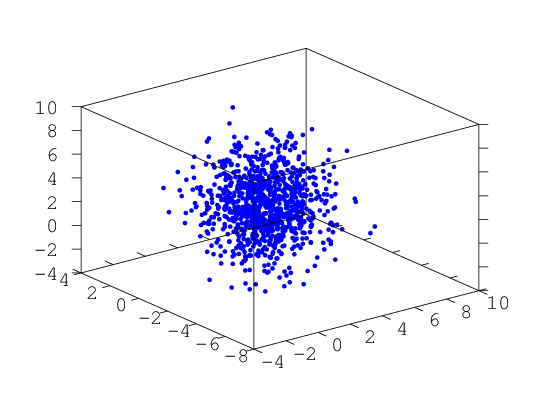

In [131]:
T = Q*sqrt(D);
mu = [2;-2; 3];
Z1 = T*Z(:,1:3)' + mu*ones(1,n);
plot3(Z1(1,:),Z1(2,:),Z1(3,:),'.')

In [133]:
muv = mean(Z1')

muv =

   1.9428  -2.1166   2.9537



In [135]:
Zn = Z1-muv'*ones(1,n);

In [138]:
[U,s,V]=svd(Zn,'ekon');

In [139]:
Shat = 1/(n-1)*U*s^2*U'

Shat =

   2.91088   0.92775   1.01067
   0.92775   3.06300   1.04582
   1.01067   1.04582   2.88829



In [140]:
S

S =

   3   1   1
   1   3   1
   1   1   3



In [197]:
[Q,D]=eig(Shat)

Q =

  -0.55839  -0.66938  -0.49003
  -0.59584   0.73462  -0.32452
  -0.57721  -0.11077   0.80905

D =

Diagonal Matrix

   4.9456        0        0
        0   2.0600        0
        0        0   1.8566



# Kompresija slik s SVD razcepom

In [198]:
A=imread("lena512.mat")
whos A

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        A         512x512                   262144  uint8

Total is 262144 elements using 262144 bytes



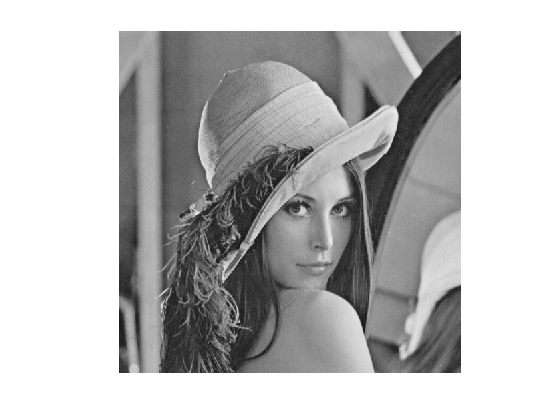

In [145]:
imshow(A)

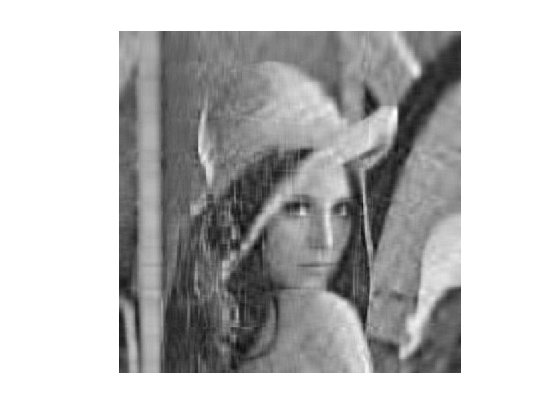

In [182]:
[U,S,V]=svds(double(A),20);
U = single(U); S=single(S); V=single(V);
imshow(uint8(U*S*V'))

In [183]:
whos U

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        U         512x20                     40960  single

Total is 10240 elements using 40960 bytes



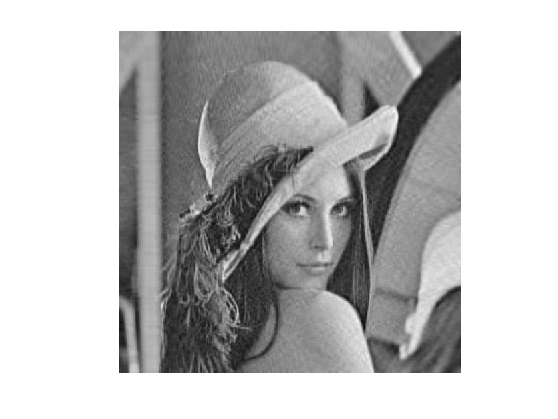

In [186]:
[U,S,V] = svds(double(A),50);
imshow(uint8(U*S*V'))

In [187]:
whos U

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        U         512x50                    204800  double

Total is 25600 elements using 204800 bytes



In [188]:
whos A

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        A         512x512                   262144  uint8

Total is 262144 elements using 262144 bytes



In [191]:
min(min(abs(U)))

ans =    3.0305e-06


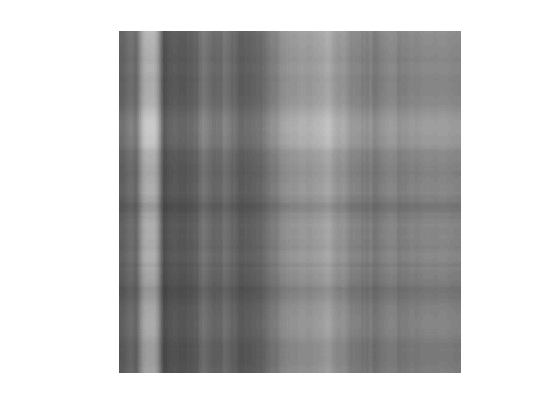

In [199]:
k = 1;
imshow(uint8(U(:,k)*S(k,k)*V(:,k)'))

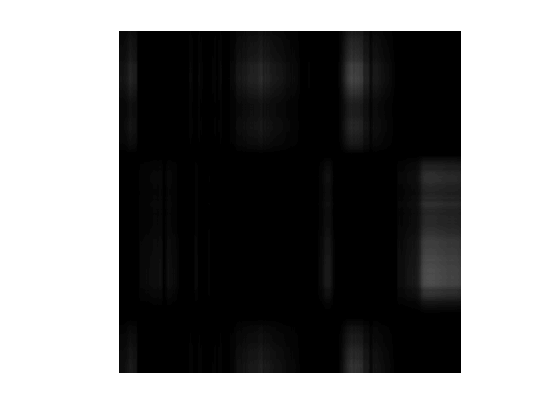

In [200]:
k = 2;
imshow(uint8(U(:,k)*S(k,k)*V(:,k)'))

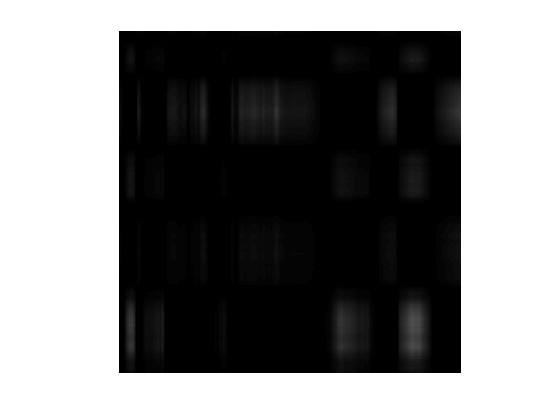

In [201]:
k = 3;
imshow(uint8(U(:,k)*S(k,k)*V(:,k)'))

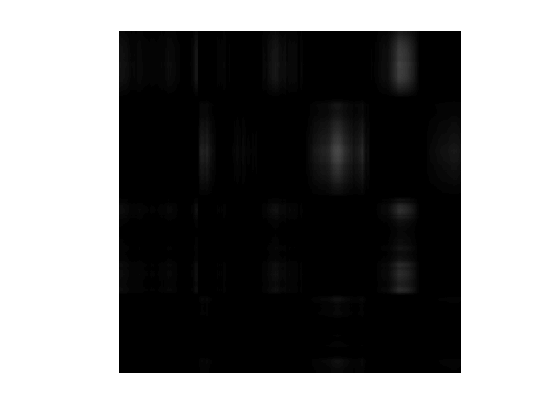

In [202]:
k = 4;
imshow(uint8(U(:,k)*S(k,k)*V(:,k)'))

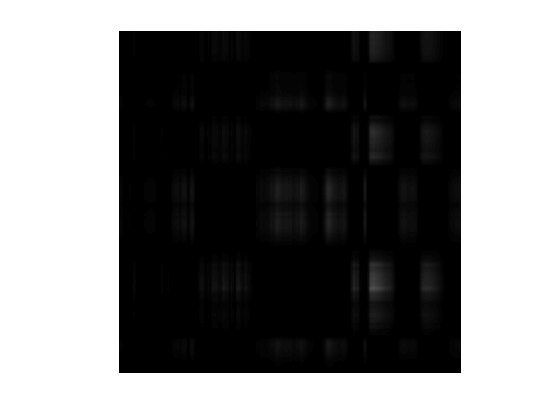

In [203]:
k = 5;
imshow(uint8(U(:,k)*S(k,k)*V(:,k)'))